# Image Filtering Using ML

Image filtering is used to enhance the edges in images and reduce the noisiness of an image. This technology is used in almost all smartphones. Although improving an image using the image filtering techniques can help in the process of object detection, face recognition and all tasks involved in computer vision. In this Program, I will take you through some Image Filtering methods with Machine Learning using Python.

- Image Filtering Using Mean Filter
- Image Filtering using Gaussian Filter
- Image Filtering using Median Filter

## 1.Image Filtering using Mean Filter

The mean filter is used to give a blur effect to an image to remove the existing noisiness. It determines the mean of the pixels within the n×n method. Then it replaces the intensity of pixels by the mean. This reduces some of the noisiness present in the image and also improves the edges of an image.

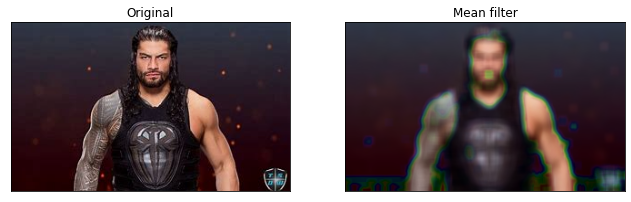

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
image = cv2.imread('OIP.jpg') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

The above figure shows that some of the noisiness has been reduced, but there are some marks now which were not present in the image before. Let’s see if those marks still appear if we filter the image into grayscale:

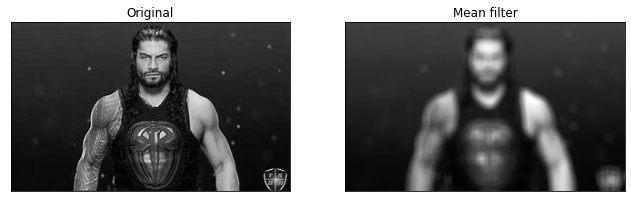

In [9]:
# The image will first be converted to grayscale
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

So as you can see after filtering it into grayscale the marks do not appear anymore, however, we have lost some smoothness of the image. I will fix it soon by using another filter.

## 2. Image Filtering using Gaussian Filter

The Gaussian filter is very similar to the mean filter, but it involves a weighted mean of the pixels with a parameter as sigma. Let’s go through this method of Image Filtering:

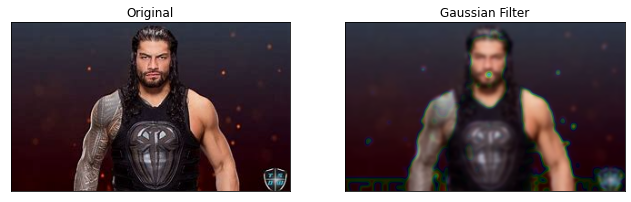

In [10]:
new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

The above figure is representing a good job comparing to the mean filter, although it also leaves some marks we saw in the mean filter. Now let’s have a look whether the Gaussian Filter removes the marks when converted into a grayscale:

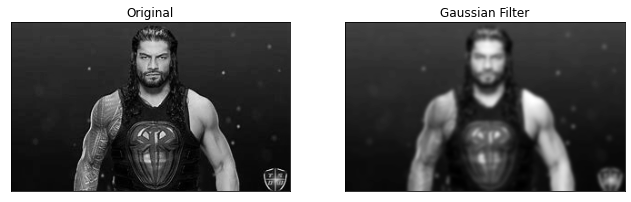

In [11]:
new_image_gauss = cv2.GaussianBlur(image2, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

As you can see, the marks are removed in the grayscale effect. Now let’s move to the next method of Image Filtering.

## 3. Image Filtering using Median Filter
The median filter computes the median of the intensity of pixels. It then replaces the norm with the pixel intensity of mean pixels. Now let’s go through this technique:

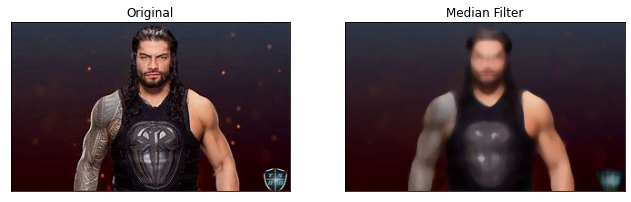

In [12]:
new_image = cv2.medianBlur(image, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

The median effect leaves a better output by removing the noisiness of the image. It also did not leave any marks in the image that we saw in the above methods. Now let’s convert it into a grayscale image:

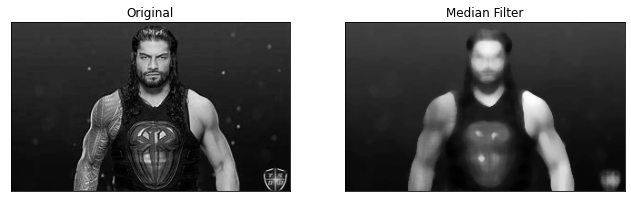

In [13]:
new_image = cv2.medianBlur(image2, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

We can see in the output that the median filter removed noisiness and also retained the edges when converted into a grayscale image. Now let’s create our own filter.

## 4. Creating Our Own Filter

Now I will create our own filter for Filtering Images than can improve the quality of the image and improves the smoothness of the picture. I will first create a function to design my own Image filter:

In [15]:
def aman_effect(data, filter_size):
  temp = []
  indexer = filter_size // 2
  new_image = data.copy()
  nrow, ncol = data.shape
  for i in range(nrow):
    for j in range(ncol):
      for k in range(i-indexer, i+indexer+1):
        for m in range(j-indexer, j+indexer+1):
          if (k > -1) and (k < nrow):
            if (m > -1) and (m < ncol):
              temp.append(data[k,m])
      temp.remove(data[i,j])
      max_value = max(temp)
      min_value = min(temp)
      if data[i,j] > max_value:
        new_image[i,j] = max_value
      elif data[i,j] < min_value:
        new_image[i,j] = min_value
        temp =[]
    return new_image.copy()

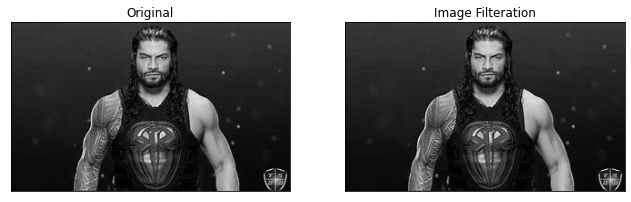

In [16]:
# Now let’s use our filter to improve the quality of the grayscale image:

new_image = aman_effect(image2,5)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Image Filteration')
plt.xticks([]), plt.yticks([])
plt.show()

In the output, you can see we have an excellent output as compared to almost all the methods that I covered above. I hope this will help you in exploring the field of computer vision in Machine Learning. I hope you liked this article on Filtering Images with Machine Learning.